In [2]:
# !pip install -U scikit-learn
import pandas as pd
import numpy as np
import klib
from platform import python_version
import numpy as np
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
import folium
from folium import plugins
import seaborn as sns

pd.set_option('display.max_columns', 100)

%precision 2
import pandas as pd
from datetime import datetime
%matplotlib inline


import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline



# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


# Start a SparkSession
import findspark
findspark.init()

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)

python 3.10.9
numpy 1.23.5
pandas 1.5.3
klib 1.0.7


In [3]:
df = pd.read_csv('Resources/2020_Clean_Traffic_Crashes.csv')

In [4]:
df

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,DAMAGE_COST,year
0,JD184955,2020-03-13 21:45:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,$500 OR LESS,FOLLOWING TOO CLOSELY,183,S,WELLS ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,21,6,3,41.879415,-87.633606,2020,0,500,2020
1,JD116085,2020-01-14 23:15:00,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",IMPROPER TURNING/NO SIGNAL,1214,E,53RD ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,23,3,1,41.799572,-87.595997,2020,0,1000,2020
2,JD122763,2020-01-20 22:48:00,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,DRY,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",DISREGARDING STOP SIGN,3424,W,OGDEN AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,22,2,1,41.856015,-87.711318,2020,0,1500,2020
3,JD134580,2020-01-30 22:54:00,30,UNKNOWN,UNKNOWN,UNKNOWN,"DARKNESS, LIGHTED ROAD",REAR TO FRONT,UNKNOWN INTERSECTION TYPE,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"OVER $1,500",NOT APPLICABLE,3700,W,CONGRESS PKWY,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,22,5,1,41.874595,-87.718136,2020,0,1500,2020
4,JD159847,2020-02-20 19:50:00,20,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FAILING TO REDUCE SPEED TO AVOID CRASH,4164,W,WABANSIA AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,19,5,2,41.911754,-87.731212,2020,0,1000,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24366,JD189551,2020-03-13 14:50:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,101,W,87TH ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,14,6,3,41.736154,-87.627240,2020,0,1500,2020
24367,JD149870,2020-02-13 00:05:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,DARKNESS,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",NOT APPLICABLE,13000,S,STONY ISLAND AVE,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0,5,2,0.000000,0.000000,2020,1,1500,2020
24368,JD144014,2020-02-07 20:23:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,815,S,AUSTIN BLVD,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,20,6,2,0.000000,0.000000,2020,0,1000,2020
24369,JD118213,2020-01-16 17:30:00,30,UNKNOWN,FUNCTIONING PROPERLY,CLEAR,DUSK,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,502,W,OHARE ST,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,17,5,1,0.000000,0.000000,2020,0,1000,2020


In [5]:
df.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              17606
INJURY AND / OR TOW DUE TO CRASH     6765
Name: CRASH_TYPE, dtype: int64

In [6]:
# retrieving list of numeric columns 
num_cols = df.select_dtypes('number').columns.tolist()
num_cols

['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'INJURY_CAT',
 'DAMAGE_COST',
 'year']

In [7]:
# Encoding catagory variables
# retrieving list of categorical columns 
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']

In [8]:
# Scaling the numeric columns
crash_data_scaled = StandardScaler().fit_transform(df[['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'INJURY_CAT',
 'year']])

# Creating a DataFrame with with the scaled data
df_crash_transformed = pd.DataFrame(crash_data_scaled, columns=['POSTED_SPEED_LIMIT',
 'STREET_NO',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'CRASH_YEAR',
 'INJURY_CAT',
 'year'])

# Display sample data
df_crash_transformed.head()

,POSTED_SPEED_LIMIT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,year
0,-0.598819,-1.220573,-0.070527,-0.329705,-0.027324,-0.126388,1.446452,0.925862,1.371172,0.102790,-0.091939,0.0,-0.619874,0.0
1,0.261615,-0.860676,-0.070527,-0.329705,-0.027324,-0.126388,1.807973,-0.617481,-1.162422,0.083023,-0.087493,0.0,-0.619874,0.0
2,1.122048,-0.089219,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,-1.131928,-1.162422,0.096996,-0.101125,0.0,-0.619874,0.0
3,0.261615,0.007126,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,0.411415,-1.162422,0.101596,-0.101931,0.0,-0.619874,0.0
4,-1.459252,0.169097,-0.070527,-0.329705,-0.027324,-0.126388,1.084932,0.411415,0.104375,0.110796,-0.103477,0.0,-0.619874,0.0


In [9]:
# Encoding catagory variables
# retrieving list of categorical columns 
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']

In [10]:
df_crash_dummies = pd.get_dummies(df[['RD_NO',
 'CRASH_DATE',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY']])

In [11]:
# Display sample data
df_crash_dummies.head()

,RD_NO_DJ166726,RD_NO_DJ177595,RD_NO_HD114501,RD_NO_JB115285,RD_NO_JB135782,RD_NO_JB137837,RD_NO_JB140557,RD_NO_JB140875,RD_NO_JB151260,RD_NO_JB174997,RD_NO_JB184588,RD_NO_JB189494,RD_NO_JC100035,RD_NO_JC100287,RD_NO_JC100614,RD_NO_JC100628,RD_NO_JC100678,RD_NO_JC100935,RD_NO_JC101015,RD_NO_JC101356,RD_NO_JC101578,RD_NO_JC101767,RD_NO_JC101780,RD_NO_JC102097,RD_NO_JC102125,RD_NO_JC102158,RD_NO_JC102296,RD_NO_JC102526,RD_NO_JC102606,RD_NO_JC102675,RD_NO_JC102806,RD_NO_JC102847,RD_NO_JC102869,RD_NO_JC102985,RD_NO_JC103157,RD_NO_JC103244,RD_NO_JC103329,RD_NO_JC103537,RD_NO_JC103539,RD_NO_JC103893,RD_NO_JC104045,RD_NO_JC104077,RD_NO_JC104518,RD_NO_JC104646,RD_NO_JC104978,RD_NO_JC105255,RD_NO_JC105261,RD_NO_JC105328,RD_NO_JC105353,RD_NO_JC105387,...,STREET_NAME_WALTON ST,STREET_NAME_WARNER AVE,STREET_NAME_WARREN BLVD,STREET_NAME_WARWICK AVE,STREET_NAME_WASHBURNE AVE,STREET_NAME_WASHINGTON BLVD,STREET_NAME_WASHINGTON ST,STREET_NAME_WASHTENAW AVE,STREET_NAME_WAVELAND AVE,STREET_NAME_WAYMAN ST,STREET_NAME_WAYNE AVE,STREET_NAME_WEBSTER AVE,STREET_NAME_WELLINGTON AVE,STREET_NAME_WELLS ST,STREET_NAME_WENTWORTH AVE,STREET_NAME_WEST END AVE,STREET_NAME_WESTERN AVE,STREET_NAME_WESTERN BLVD,STREET_NAME_WESTSHORE DR,STREET_NAME_WHIPPLE ST,STREET_NAME_WIELAND ST,STREET_NAME_WILCOX ST,STREET_NAME_WILLOW ST,STREET_NAME_WILSON AVE,STREET_NAME_WILSON DR,STREET_NAME_WINCHESTER AVE,STREET_NAME_WINDSOR AVE,STREET_NAME_WINNEMAC AVE,STREET_NAME_WINONA ST,STREET_NAME_WINSTON AVE,STREET_NAME_WINTHROP AVE,STREET_NAME_WISCONSIN ST,STREET_NAME_WOLCOTT AVE,STREET_NAME_WOLF POINT PLZ,STREET_NAME_WOLFRAM ST,STREET_NAME_WOOD ST,STREET_NAME_WOODLAWN AVE,STREET_NAME_WRIGHTWOOD AVE,STREET_NAME_YALE AVE,STREET_NAME_YATES BLVD,STREET_NAME_ZEMKE RD,WORK_ZONE_TYPE_CONSTRUCTION,WORK_ZONE_TYPE_MAINTENANCE,WORK_ZONE_TYPE_UNKNOWN,WORK_ZONE_TYPE_UTILITY,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
# Concatenate the `df_crash_transformed` encoded dummies with the scaled data DataFrame
final_crash_scaled = pd.concat([df_crash_transformed,df_crash_dummies], axis=1)

# Display the sample data
final_crash_scaled.head()

,POSTED_SPEED_LIMIT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR,INJURY_CAT,year,RD_NO_DJ166726,RD_NO_DJ177595,RD_NO_HD114501,RD_NO_JB115285,RD_NO_JB135782,RD_NO_JB137837,RD_NO_JB140557,RD_NO_JB140875,RD_NO_JB151260,RD_NO_JB174997,RD_NO_JB184588,RD_NO_JB189494,RD_NO_JC100035,RD_NO_JC100287,RD_NO_JC100614,RD_NO_JC100628,RD_NO_JC100678,RD_NO_JC100935,RD_NO_JC101015,RD_NO_JC101356,RD_NO_JC101578,RD_NO_JC101767,RD_NO_JC101780,RD_NO_JC102097,RD_NO_JC102125,RD_NO_JC102158,RD_NO_JC102296,RD_NO_JC102526,RD_NO_JC102606,RD_NO_JC102675,RD_NO_JC102806,RD_NO_JC102847,RD_NO_JC102869,RD_NO_JC102985,RD_NO_JC103157,RD_NO_JC103244,...,STREET_NAME_WALTON ST,STREET_NAME_WARNER AVE,STREET_NAME_WARREN BLVD,STREET_NAME_WARWICK AVE,STREET_NAME_WASHBURNE AVE,STREET_NAME_WASHINGTON BLVD,STREET_NAME_WASHINGTON ST,STREET_NAME_WASHTENAW AVE,STREET_NAME_WAVELAND AVE,STREET_NAME_WAYMAN ST,STREET_NAME_WAYNE AVE,STREET_NAME_WEBSTER AVE,STREET_NAME_WELLINGTON AVE,STREET_NAME_WELLS ST,STREET_NAME_WENTWORTH AVE,STREET_NAME_WEST END AVE,STREET_NAME_WESTERN AVE,STREET_NAME_WESTERN BLVD,STREET_NAME_WESTSHORE DR,STREET_NAME_WHIPPLE ST,STREET_NAME_WIELAND ST,STREET_NAME_WILCOX ST,STREET_NAME_WILLOW ST,STREET_NAME_WILSON AVE,STREET_NAME_WILSON DR,STREET_NAME_WINCHESTER AVE,STREET_NAME_WINDSOR AVE,STREET_NAME_WINNEMAC AVE,STREET_NAME_WINONA ST,STREET_NAME_WINSTON AVE,STREET_NAME_WINTHROP AVE,STREET_NAME_WISCONSIN ST,STREET_NAME_WOLCOTT AVE,STREET_NAME_WOLF POINT PLZ,STREET_NAME_WOLFRAM ST,STREET_NAME_WOOD ST,STREET_NAME_WOODLAWN AVE,STREET_NAME_WRIGHTWOOD AVE,STREET_NAME_YALE AVE,STREET_NAME_YATES BLVD,STREET_NAME_ZEMKE RD,WORK_ZONE_TYPE_CONSTRUCTION,WORK_ZONE_TYPE_MAINTENANCE,WORK_ZONE_TYPE_UNKNOWN,WORK_ZONE_TYPE_UTILITY,MOST_SEVERE_INJURY_FATAL,MOST_SEVERE_INJURY_INCAPACITATING INJURY,MOST_SEVERE_INJURY_NO INDICATION OF INJURY,MOST_SEVERE_INJURY_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT"
0,-0.598819,-1.220573,-0.070527,-0.329705,-0.027324,-0.126388,1.446452,0.925862,1.371172,0.102790,-0.091939,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.261615,-0.860676,-0.070527,-0.329705,-0.027324,-0.126388,1.807973,-0.617481,-1.162422,0.083023,-0.087493,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.122048,-0.089219,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,-1.131928,-1.162422,0.096996,-0.101125,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.261615,0.007126,-0.070527,-0.329705,-0.027324,-0.126388,1.627213,0.411415,-1.162422,0.101596,-0.101931,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.459252,0.169097,-0.070527,-0.329705,-0.027324,-0.126388,1.084932,0.411415,0.104375,0.110796,-0.103477,0.0,-0.619874,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [13]:
# Split the data into X (features) and y (target)
# The y variable should focus on the target column
y = final_crash_scaled['MOST_SEVERE_INJURY_NO INDICATION OF INJURY'].values.reshape(-1, 1)

# The X variable should include all features except the target
X = final_crash_scaled.drop(columns=['MOST_SEVERE_INJURY_NO INDICATION OF INJURY'])

In [14]:
y[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=uint8)

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train.shape

(18278, 41988)

In [37]:
# Creating StandardScaler instance
scaler = StandardScaler()


In [38]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [39]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 0.26, -0.34, -0.07, ..., -0.14, -0.28, -0.21],
       [ 1.12,  1.25, -0.07, ..., -0.14, -0.28, -0.21],
       [ 0.26, -0.58, -0.07, ..., -0.14, -0.28, -0.21],
       ...,
       [ 0.26, -1.  , -0.07, ..., -0.14, -0.28, -0.21],
       [ 0.26, -0.72, -0.07, ..., -0.14, -0.28, -0.21],
       [ 0.26,  1.22,  2.1 , ..., -0.14, -0.28, -0.21]])

# Fitting the Decision Tree Model

In [40]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()


In [41]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [42]:
# Making predictions using the testing data
predictions = model.predict(X_test)

C:\Users\akiye\anaconda4\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# Model Evaluation

In [43]:
# #Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [44]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,835,17
Actual 1,0,5241


Accuracy Score : 0.9972099130149352
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       852
           1       1.00      1.00      1.00      5241

    accuracy                           1.00      6093
   macro avg       1.00      0.99      0.99      6093
weighted avg       1.00      1.00      1.00      6093



# Visualizing the Decision Tree

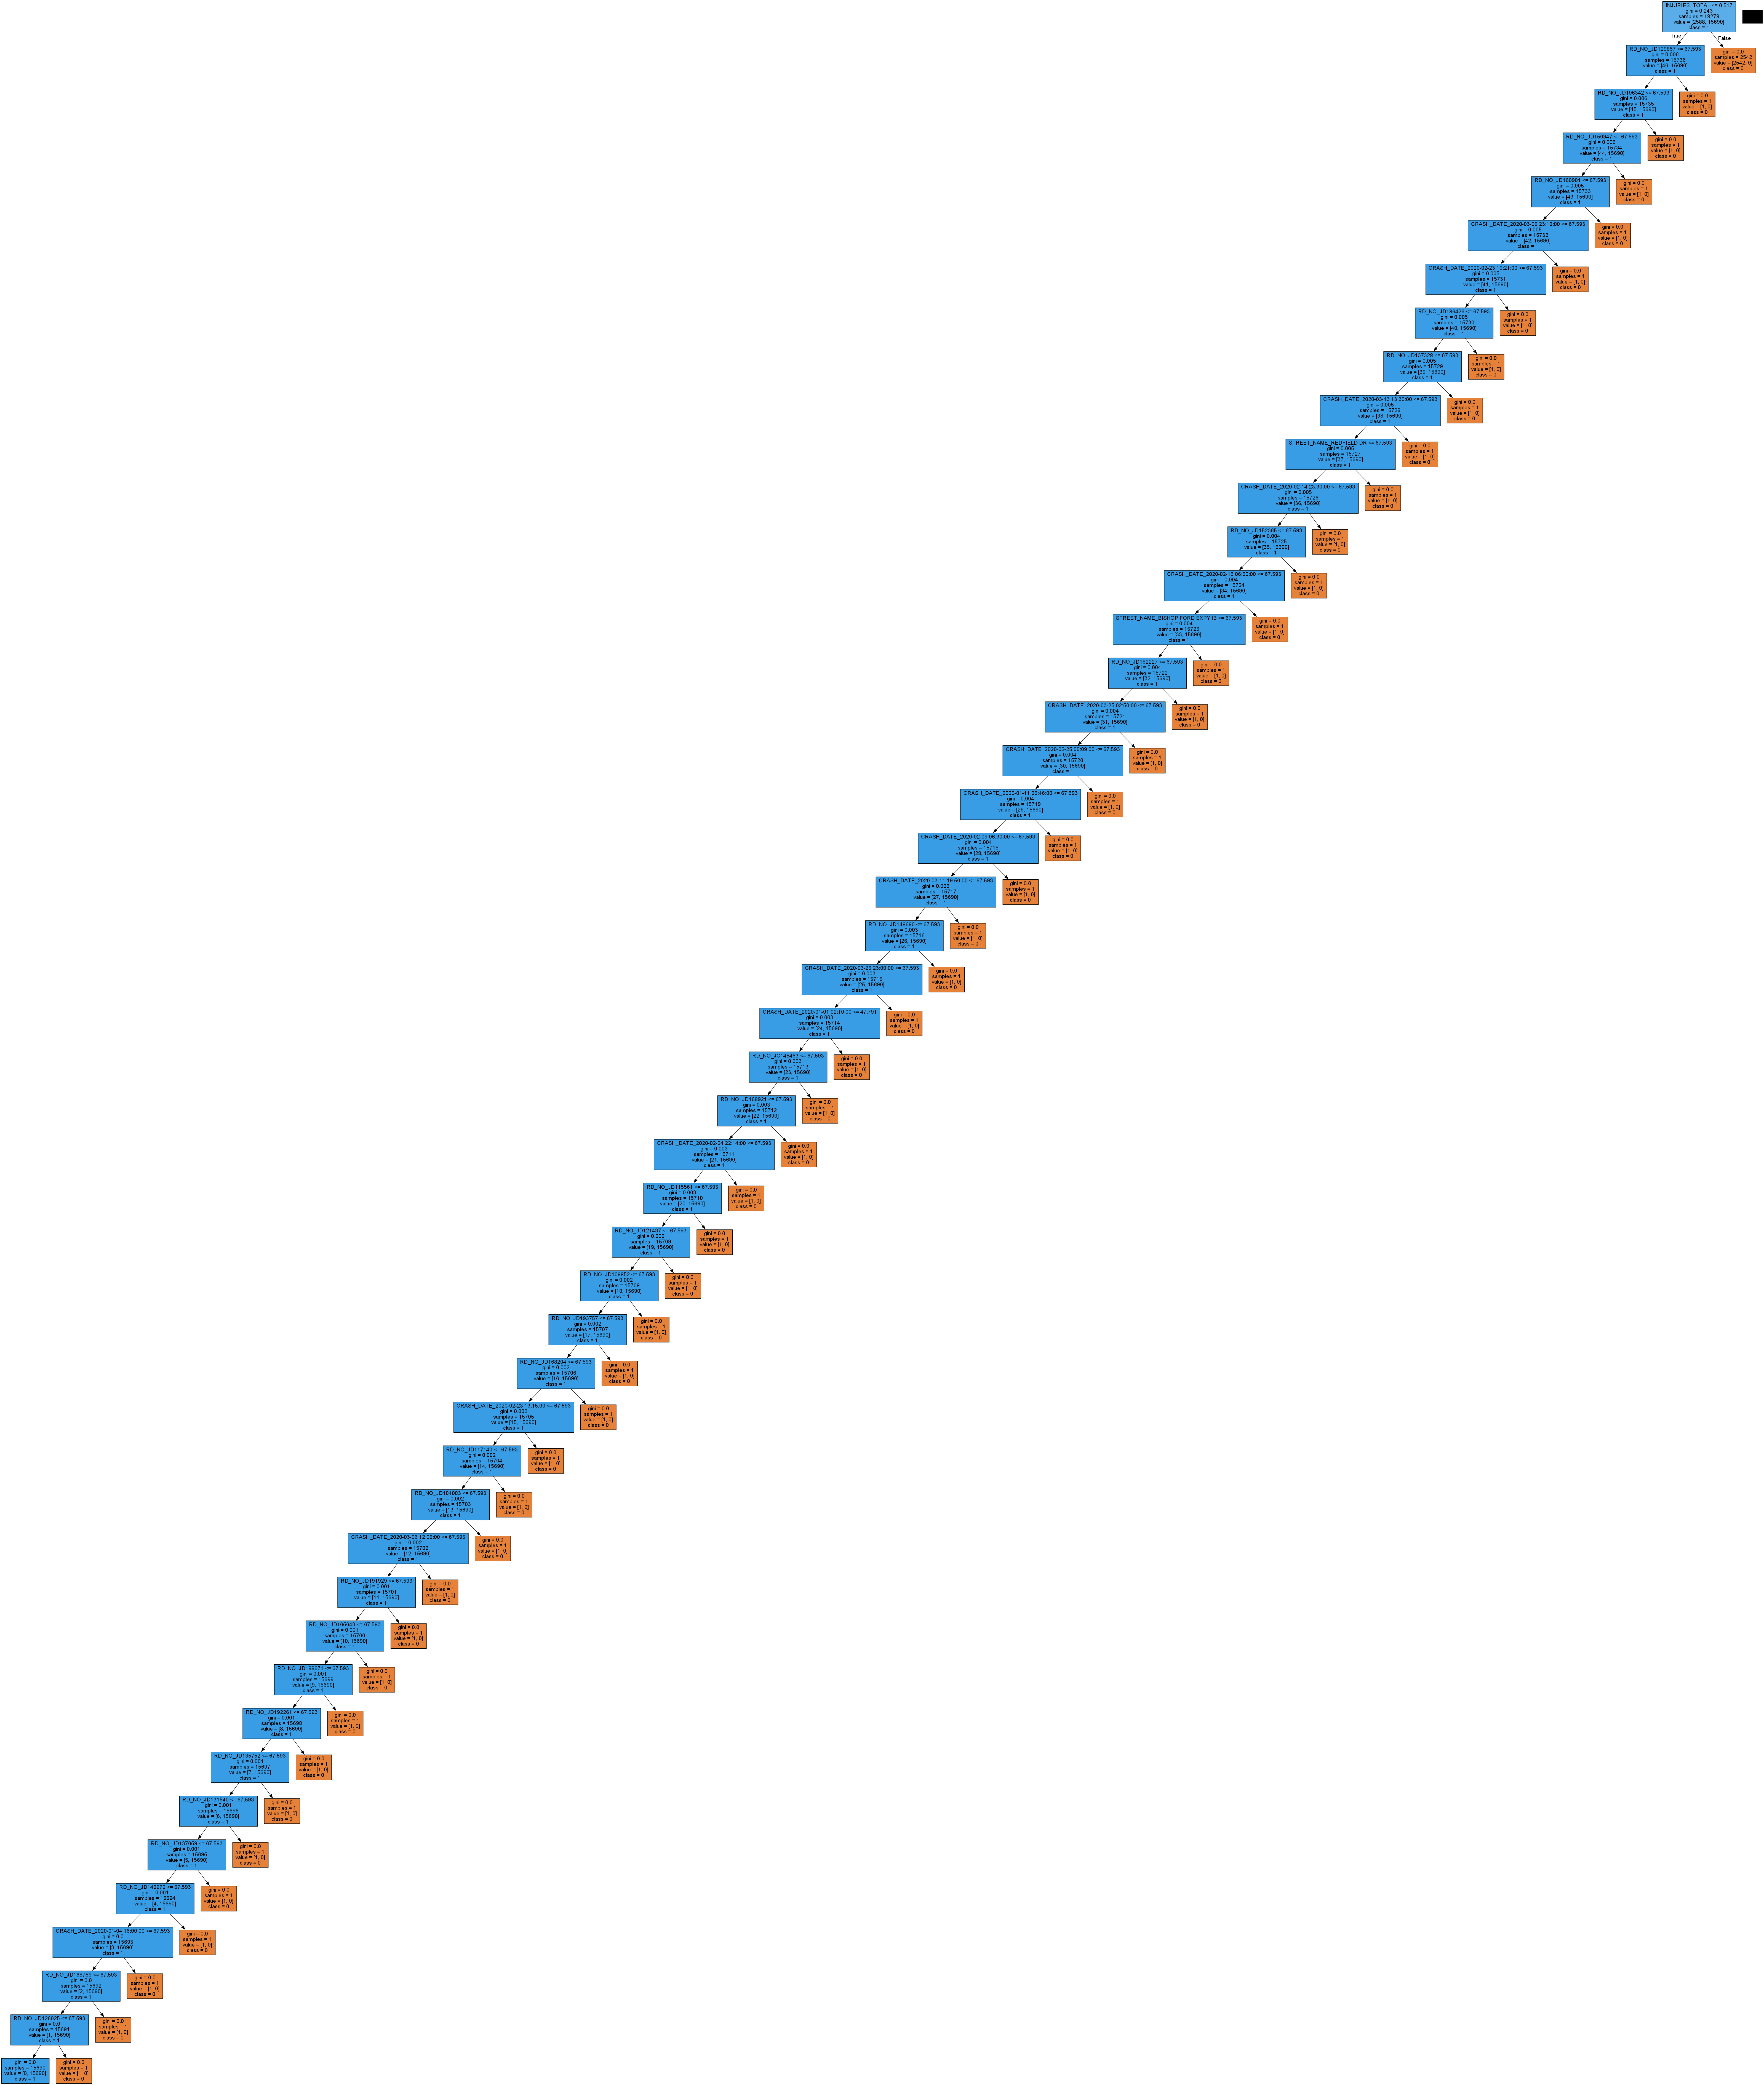

In [45]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [46]:
# Saving the tree as PDF
file_path = ("Resources/crash_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("Resources/crash_tree.png")
graph.write_png(file_path)


True